<font size = 6 color = 'green'> Web Scraping - SENAMHI

<font size = 5 color = 'green'> Autor : Bach. Daniel A. Porras Nuñez


## <font size = 5 color = 'black'> **Función de Web Scraping para exportar datos meteorologicos historico de las estaciones de SENAMHI**

In [1]:
!pip install beautifulsoup4==4.12.3 certifi==2024.2.2 charset-normalizer==3.3.2 et-xmlfile==1.1.0 idna==3.6 lxml==5.1.0 numpy==1.26.4 openpyxl==3.1.2 pandas==2.2.0 python-dateutil==2.8.2 pytz==2024.1 requests==2.31.0 six==1.16.0 soupsieve==2.5 tzdata==2024.1 urllib3==2.2.0

In [2]:
import pkg_resources

libraries = [
    'beautifulsoup4', 'certifi', 'charset-normalizer', 'et-xmlfile', 'idna',
    'lxml', 'numpy', 'openpyxl', 'pandas', 'python-dateutil', 'pytz',
    'requests', 'six', 'soupsieve', 'tzdata', 'urllib3'
]

for lib in libraries:
    try:
        version = pkg_resources.get_distribution(lib).version
        print(f"{lib}: {version} (instalado correctamente)")
    except pkg_resources.DistributionNotFound:
        print(f"{lib}: No se encontró la librería")

/tmp/ipython-input-3542600907.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


beautifulsoup4: 4.12.3 (instalado correctamente)
certifi: 2024.2.2 (instalado correctamente)
charset-normalizer: 3.3.2 (instalado correctamente)
et-xmlfile: 1.1.0 (instalado correctamente)
idna: 3.6 (instalado correctamente)
lxml: 5.1.0 (instalado correctamente)
numpy: 1.26.4 (instalado correctamente)
openpyxl: 3.1.2 (instalado correctamente)
pandas: 2.2.0 (instalado correctamente)
python-dateutil: 2.8.2 (instalado correctamente)
pytz: 2024.1 (instalado correctamente)
requests: 2.31.0 (instalado correctamente)
six: 1.16.0 (instalado correctamente)
soupsieve: 2.5 (instalado correctamente)
tzdata: 2024.1 (instalado correctamente)
urllib3: 2.2.0 (instalado correctamente)


In [5]:
import pandas as pd
xyz = pd.read_csv("/content/ema_xyz.csv", index_col=0)
xyz.head()

,CODE,ESTACION,LON,LAT,ALT
0,X47E0D438,ALAMOR,-80.39788,-4.48047,116.0
1,X47E09732,LA ARDILLA,-80.39014,-4.48956,116.0
2,X472606FA,AYABACA,-79.71077,-4.63776,2633.0
3,X47E01126,CABO INGA H,-80.39898,-3.97972,143.0
4,X472F00A6,CABO INGA M,-80.40182,-3.97594,228.0


In [10]:
import pandas as pd
# Cargar nombres de estaciones desde archivo Excel
estaciones = pd.read_excel("/content/Maestra de estaciones Senamhi.xlsx")
estaciones.head()


,DZ,NOMBRE_ESTACION,CODIGO,CONVENCIONAL,AUTOMATICA,FECHA_DE_INSTALACION,ULTIMO_REGISTRO,ESTADO,LATITUD,LONGITUD,ALTITUD,DEPARTAMENTO,PROVINCIA,DISTRITO,REGION_HIDROGRAFICA,UNIDAD_HIDROGRAFICA
0,1,ALAMOR,104044,PLU,NaN,1997-12-01,ACTUALMENTE,OPERATIVA,-4.477400,-80.397950,187.0,PIURA,SULLANA,LANCONES,PACÍFICO,Alamor
1,1,ALAMOR,200322,HLM,NaN,2017-02-01,ACTUALMENTE,OPERATIVA,-4.473980,-80.399250,128.0,PIURA,SULLANA,LANCONES,PACÍFICO,Alamor
2,1,ALAMOR,47E0D438,NaN,EHA,2014-12-17,ACTUALMENTE,OPERATIVA,-4.480470,-80.397880,116.0,PIURA,SULLANA,LANCONES,PACÍFICO,Alamor
3,1,ALTO_DE_POCLUS,104097,CO,NaN,2008-06-01,ACTUALMENTE,OPERATIVA,-4.916900,-79.890470,3077.0,PIURA,AYABACA,FRIAS,PACÍFICO,Piura
4,1,ARDILLA,47E09732,NaN,EHA,2015-02-20,ACTUALMENTE,OPERATIVA,-4.489556,-80.390383,116.0,PIURA,SULLANA,LANCONES,PACÍFICO,Medio Bajo Chira


In [7]:
import geopandas as gpd
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dem_peru = xr.open_dataset("/content/DEM.nc")
dem_peru

<xarray.Dataset> Size: 11MB
Dimensions:    (latitude: 1982, longitude: 1422)
Coordinates:
  * longitude  (longitude) float64 11kB -81.4 -81.39 -81.38 ... -67.2 -67.19
  * latitude   (latitude) float64 16kB 1.22 1.21 1.2 ... -18.57 -18.58 -18.59
Data variables:
    crs        int32 4B ...
    DEM        (latitude, longitude) float32 11MB ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.3-13)
    date:         2021-06-17 23:11:50

In [8]:
shp_peru = gpd.read_file("/content/Departamentos.shp")

Text(0.5, 36.283333333333324, '')

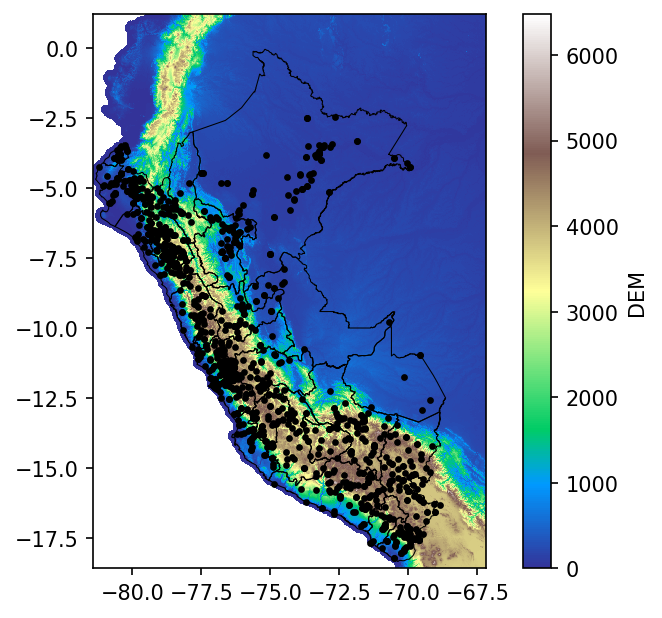

In [9]:
fig, ax = plt.subplots(dpi=150)

im_grid = dem_peru.DEM.plot(ax=ax, cmap = "terrain")
im_shp = shp_peru.geometry.boundary.plot(ax = ax, edgecolor = "black", linewidth = .5)
im_points = estaciones.plot.scatter(x="LONGITUD", y="LATITUD", ax = ax, c = "black", s = 5)

ax.set_ylabel("")
ax.set_xlabel("")

Text(0.5, 56.08333333333332, '')

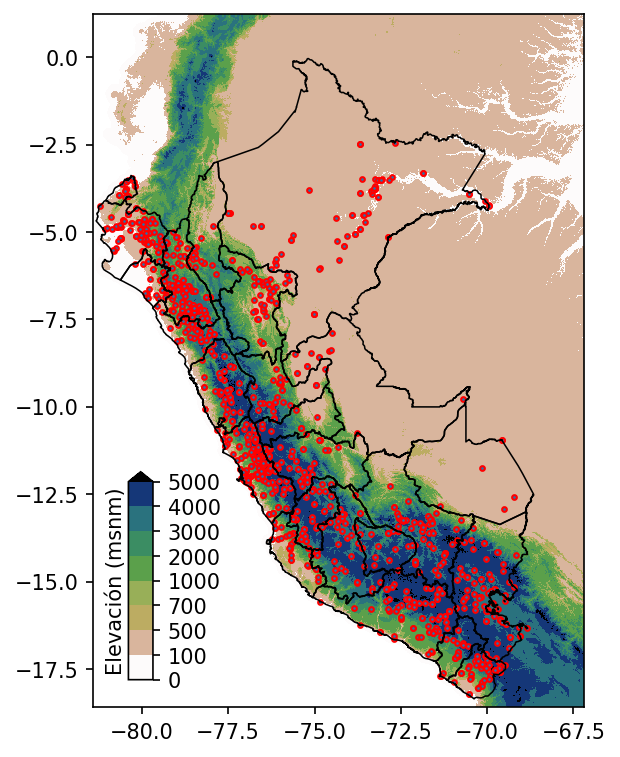

In [14]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.dates as mdates
fig, ax = plt.subplots(dpi=150, figsize=(8, 6))

im_grid = dem_peru.DEM.plot(ax=ax, cmap = "gist_earth_r", levels = [0, 100, 500, 700, 1000, 2000, 3000, 4000, 5000], add_colorbar=False)
axin = inset_axes(ax, width='5%', height='30%', loc = 'lower left', bbox_to_anchor = (0.05, 0.025, 1 ,1), bbox_transform = ax.transAxes)
cb = plt.colorbar(im_grid, cax=axin, orientation = "vertical", aspect = 5)
cb.ax.set_ylabel('Elevación (msnm)', labelpad=-55)

im_shp = shp_peru.geometry.boundary.plot(ax = ax, edgecolor = "black", linewidth = .75)
im_points = estaciones.plot.scatter(x="LONGITUD", y="LATITUD", ax = ax, edgecolors = "red", s = 5)

ax.set_ylabel("")
ax.set_xlabel("")

In [10]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import os
import re

def stations():
    link = "https://www.senamhi.gob.pe/mapas/mapa-estaciones-2/"
    response = requests.get(link)
    stn_senamhi = BeautifulSoup(response.text, 'html.parser')

    stn_senamhi2 = re.split(r'nom', str(stn_senamhi))[1:]
    stn = []
    cat = []
    lat = []
    lon = []
    ico = []
    cod = []
    cod_old = []
    estado = []
    data_stn = []

    for i in range(len(stn_senamhi2)):
        x = stn_senamhi2[i].replace('"', '').replace(': ', ":").replace(',\n', "").replace('\}\{', "")
        data_estaciones = x.split(",")
        stn.append(data_estaciones[0].replace(":", ""))
        cat.append(data_estaciones[1].replace("cate:", ""))
        lat.append(data_estaciones[2].replace("lat:", ""))
        lon.append(data_estaciones[3].replace("lon:", ""))
        ico.append(data_estaciones[4].replace(" ico:", ""))
        cod.append(data_estaciones[5].replace(" cod:", "") if data_estaciones[5][:5] == " cod:" else None)
        cod_old.append(data_estaciones[6].replace("cod_old:", "") if data_estaciones[6][:8] == "cod_old:" else None)
        estado_value = data_estaciones[7] if len(data_estaciones) > 7 else data_estaciones[6]
        estado.append(estado_value.replace("}{", "").replace(" estado:", "") if estado_value[:8] == " estado:" else None)

        data_stn.append(pd.DataFrame({
            'estacion': stn[-1],
            'categoria': cat[-1],
            'lat': lat[-1],
            'lon': lon[-1],
            'ico': ico[-1],
            'cod': cod[-1],
            'cod_old': cod_old[-1],
            'estado': estado[-1]
        }, index=[0]))

    df_stns = pd.concat(data_stn, ignore_index=True)
    return df_stns

def senamhiws_info(code, stations, from_date=None, to_date=None, lat=None, lon=None, stc=None):
    if not code or not isinstance(code, str):
        print("Codigo no definido")
        return None

    df_history_senamhi = []

    if from_date is None and to_date is None:
        from_date = datetime(2016, 1, 1)
        to_date = datetime(2023, 12, 31)
    elif from_date is None and to_date is not None:
        from_date = datetime(2016, 1, 1)
    elif from_date is not None and to_date is None:
        to_date = datetime(2023, 12, 31)

    idx_cod = stations.index[stations['cod'] == code]
    df_idx_stn = stations.loc[idx_cod].reset_index(drop=True)

    ts_date = pd.date_range(from_date, to_date, freq='MS')
    tsw_date = ts_date.strftime('%Y%m')

    for j, date in enumerate(ts_date):
        if pd.isna(df_idx_stn['cod'][0]):
            link = f"https://www.senamhi.gob.pe//mapas/mapa-estaciones-2/export.php?estaciones={df_idx_stn['cod'].iloc[0]}&CBOFiltro={tsw_date[j]}&t_e={df_idx_stn['ico'].iloc[0]}&estado={df_idx_stn['estado'].iloc[0]}&cod_old={df_idx_stn['cod_old'].iloc[0]}"
        else:
            link = f"https://www.senamhi.gob.pe//mapas/mapa-estaciones-2/export.php?estaciones={df_idx_stn['cod'].iloc[0]}&CBOFiltro={tsw_date[j]}&t_e={df_idx_stn['ico'].iloc[0]}&estado={df_idx_stn['estado'].iloc[0]}"

        try:
            print(f"Descargando datos desde: {link}")
            data_stn_senamhi = pd.read_html(link)
        except ValueError as e:
            print(f"Error al leer HTML desde el enlace: {e}")
            print(f"El enlace que falló es: {link}")
            continue

        # Procesar los datos descargados
        data_df_history_senamhi = data_stn_senamhi[1]
        data_df_history_senamhi.columns = data_df_history_senamhi.iloc[0]
        data_df_history_senamhi = data_df_history_senamhi[1:]

        # Eliminar filas que contienen los encabezados repetidos
        data_df_history_senamhi = data_df_history_senamhi[data_df_history_senamhi.iloc[:, 0] != 'AÑO / MES / DÍA']

        # Añadir información adicional
        data_df_history_senamhi["estacion"] = stc
        data_df_history_senamhi["lat"] = lat
        data_df_history_senamhi["lon"] = lon

        # Añadir los datos al historial
        df_history_senamhi.append(data_df_history_senamhi)

    # Combinar todos los datos descargados en un único DataFrame
    if df_history_senamhi:
        df_combined = pd.concat(df_history_senamhi, ignore_index=True)
        output_filename = f"{code}_{df_idx_stn['estacion'].iloc[0]}_historico.xlsx"
        df_combined.to_excel(output_filename, index=False)
        print(f"Datos combinados guardados en: {output_filename}")
    else:
        print("No se encontraron datos para la estación especificada.")

    return df_history_senamhi

In [15]:
# Uso del código
stations_data = stations()
print(stations_data[stations_data["estacion"] == 'LA ARDILLA'])

       estacion categoria        lat         lon ico       cod cod_old  \
857  LA ARDILLA       EHA   -4.49094   -80.38819   H  47E09732    None   

         estado  
857  AUTOMATICA  


In [17]:
# Filtrar datos de la estación específica
stations_data = stations()

stations_data = stations_data[stations_data["cod"] == '47E09732']
print("aaaaa", stations_data.head())

aaaaa        estacion categoria        lat         lon ico       cod cod_old  \
857  LA ARDILLA       EHA   -4.49094   -80.38819   H  47E09732    None   

         estado  
857  AUTOMATICA  


In [18]:
#Este codigo descarga los datos de la estacion definida anteriormente y los combina en un solo archivo excel
# Convertir latitud y longitud a números
stations_data['lat'] = pd.to_numeric(stations_data['lat'], errors='coerce')
stations_data['lon'] = pd.to_numeric(stations_data['lon'], errors='coerce')

lat = stations_data['lat'].tolist()[0]
lon = stations_data['lon'].tolist()[0]
stc = stations_data['estacion'].tolist()[0]
codigo = stations_data['cod'].tolist()[0]
print('codigo', codigo)

print("values", lat, lon, stc)

# Llamar a la función para obtener datos históricos
try:
    resultados = senamhiws_info(codigo, stations_data, '2000-01-01', '2025-09-30', lat, lon, stc)
except Exception as e:
    print(f"An error occurred: {e}")

codigo 47E09732
values -4.49094 -80.38819 LA ARDILLA
Descargando datos desde: https://www.senamhi.gob.pe//mapas/mapa-estaciones-2/export.php?estaciones=47E09732&CBOFiltro=200001&t_e=H&estado=AUTOMATICA
Descargando datos desde: https://www.senamhi.gob.pe//mapas/mapa-estaciones-2/export.php?estaciones=47E09732&CBOFiltro=200002&t_e=H&estado=AUTOMATICA
Descargando datos desde: https://www.senamhi.gob.pe//mapas/mapa-estaciones-2/export.php?estaciones=47E09732&CBOFiltro=200003&t_e=H&estado=AUTOMATICA
Descargando datos desde: https://www.senamhi.gob.pe//mapas/mapa-estaciones-2/export.php?estaciones=47E09732&CBOFiltro=200004&t_e=H&estado=AUTOMATICA
Descargando datos desde: https://www.senamhi.gob.pe//mapas/mapa-estaciones-2/export.php?estaciones=47E09732&CBOFiltro=200005&t_e=H&estado=AUTOMATICA
Descargando datos desde: https://www.senamhi.gob.pe//mapas/mapa-estaciones-2/export.php?estaciones=47E09732&CBOFiltro=200006&t_e=H&estado=AUTOMATICA
Descargando datos desde: https://www.senamhi.gob.pe//

# <font size = 5 color = 'black'> **Función de Web Scraping para exportar datos historicos de calidad de aire de Lima de las estaciones de SENAMHI**

In [1]:
pip install --upgrade selenium

In [2]:
import pandas as pd
# Cargar nombres de estaciones desde archivo Excel
df_estaciones = pd.read_excel("/content/Complemento.xlsx")
dict_cod_a_nombre = dict(zip(df_estaciones['estacion'].astype(str), df_estaciones['est_nombre']))
dict_cod_a_nombre

{'111286': 'CARABAYLLO',
 '111287': 'PUENTE_PIEDRA',
 '112192': 'ATE',
 '112193': 'SAN_BORJA',
 '112194': 'CAMPO_DE_MARTE',
 '112208': 'SANTA_ANITA',
 '112233': 'VILLA_MARIA_DEL_TRIUNFO',
 '112265': 'SAN_MARTIN_DE_PORRES',
 '112266': 'HUACHIPA',
 '112267': 'SAN_JUAN_DE_LURIGANCHO'}

In [8]:
!pip install folium

In [19]:
import pandas as pd
import folium
import re

# Función robusta: convierte DMS a decimal o devuelve el valor si ya es float
def dms_a_decimal(coord):
    if pd.isna(coord):
        return None
    if isinstance(coord, float) or isinstance(coord, int):
        return coord
    coord = str(coord)
    try:
        partes = re.split('[°′″\'"]+', coord.replace('’', '′').replace("'", "′"))
        partes = [p.strip() for p in partes if p.strip()]
        grados = float(partes[0])
        minutos = float(partes[1])
        segundos = float(partes[2])
        signo = -1 if grados < 0 else 1
        return signo * (abs(grados) + minutos / 60 + segundos / 3600)
    except Exception as e:
        print(f"⚠️ Error con coordenada: {coord} → {e}")
        return None

# Cargar el Excel
df_estaciones = pd.read_excel("/content/Complemento.xlsx")

# Convertir latitud y longitud a decimal
df_estaciones['latitud_decimal'] = df_estaciones['y_lat'].apply(dms_a_decimal)
df_estaciones['longitud_decimal'] = df_estaciones['x_lon'].apply(dms_a_decimal)

# Crear el mapa base centrado en Lima
m = folium.Map(location=[-12.0464, -77.0428], zoom_start=10)

# Añadir las estaciones al mapa
for _, row in df_estaciones.iterrows():
    nombre = row['est_nombre']
    codigo = row['estacion']
    lat = row['latitud_decimal']
    lon = row['longitud_decimal']

    folium.Marker(
        location=[lat, lon],
        popup=f"<b>{nombre}</b><br>Código: {codigo}",
        tooltip=nombre,
        icon=folium.Icon(color='green', icon='cloud')
    ).add_to(m)

# Mostrar el mapa
m

In [17]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
import os
'''
{'111286': 'CARABAYLLO',
 '111287': 'PUENTE_PIEDRA',
 '112192': 'ATE',
 '112193': 'SAN_BORJA',
 '112194': 'CAMPO_DE_MARTE',
 '112208': 'SANTA_ANITA',
 '112233': 'VILLA_MARIA_DEL_TRIUNFO',
 '112265': 'SAN_MARTIN_DE_PORRES',
 '112266': 'HUACHIPA',
 '112267': 'SAN_JUAN_DE_LURIGANCHO'}
 '''


# Estaciones de Lima
estaciones = ["111286", "111287","112192",'112193','112194','112208','112233','112265','112266','112267']

# Cargar nombres de estaciones desde archivo Excel
df_estaciones = pd.read_excel("/content/Complemento.xlsx")
dict_cod_a_nombre = dict(zip(df_estaciones['estacion'].astype(str), df_estaciones['est_nombre']))

# Configuración headless del navegador
options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=options)

# Crear carpeta de salida
os.makedirs("datos_senamhi", exist_ok=True)

for est in estaciones:
    print(f"📡 Procesando estación {est}...")

    url = f'https://www.senamhi.gob.pe/?p=calidad_del_aire-estadistica&e={est}'
    driver.get(url)

    try:
        WebDriverWait(driver, 15).until(
            EC.element_to_be_clickable((By.XPATH, '/html/body/div[3]/div/div/div[1]/table/tbody/tr[2]/td[6]/a'))
        ).click()

        WebDriverWait(driver, 15).until(
            EC.frame_to_be_available_and_switch_to_it((By.ID, "iframeGraficas"))
        )

        select_conta = Select(WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, 'cboConta'))
        ))
        total_conta = len(select_conta.options)

        # Diccionario para guardar series por contaminante
        data_dict = {}

        for pc in range(1, total_conta):
            Select(driver.find_element(By.ID, 'cboConta')).select_by_index(pc)
            time.sleep(1)

            fecha1 = driver.find_element(By.ID, 'datepickerFch1')
            fecha1.clear()
            fecha1.send_keys("12/09/2014")
            fecha1.send_keys(Keys.RETURN)

            WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.XPATH, '/html/body/div[1]/div[1]/form/div[7]/button'))
            ).click()
            time.sleep(6)

            WebDriverWait(driver, 10).until(
                EC.frame_to_be_available_and_switch_to_it((By.XPATH, '/html/body/div[1]/div[2]/iframe'))
            )
            time.sleep(1)

            script_html = driver.find_element(By.XPATH, '/html/body/script[3]').get_attribute('innerHTML')
            partes = script_html.split("{")

            fechas = partes[5].split("categories: [")[1].split("]")[0].replace("'", "").split(",")

            if pc == 4:
                valores = partes[16]
                nombre = partes[15]
            else:
                valores = partes[14]
                nombre = partes[13]

            valores = valores.split("data: [")[1].split("]")[0].split(",")
            nombre = nombre.split("name: '")[1].split("'")[0]

            serie = pd.Series(valores, index=fechas)
            data_dict[nombre] = serie

            print(f"  └── Contaminante '{nombre}' descargado con {len(serie)} registros.")

            driver.switch_to.parent_frame()

        # Combinar todas las series en un solo DataFrame alineado por fecha
        df_final = pd.DataFrame(data_dict)
        df_final.index.name = 'fecha'
        df_final.reset_index(inplace=True)

        # Añadir estación
        estacion_nombre = dict_cod_a_nombre.get(est, "DESCONOCIDA")
        df_final["estacion_codigo"] = est
        df_final["estacion_nombre"] = estacion_nombre

        # Guardar Excel
        nombre_archivo = f"datos_senamhi/{est}_contaminantes.xlsx"
        df_final.to_excel(nombre_archivo, index=False)
        print(f"✅ Archivo generado: {nombre_archivo}")

        # Cerrar ventana emergente
        driver.switch_to.parent_frame()
        WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, '/html/body/div[3]/div/div/div[2]/div/div/div[2]/button'))
        ).click()
        time.sleep(2)

    except Exception as e:
        print(f"  ⚠️ Error en estación {est}: {e}")
        continue

driver.quit()
print("✅ Proceso finalizado.")


📡 Procesando estación 111286...
  └── Contaminante 'Material Particulado menor a 10 micras (PM10)' descargado con 71385 registros.
  └── Contaminante 'Material Particulado menor a 2.5 micras (PM2.5)' descargado con 71385 registros.
  └── Contaminante 'Dioxido de Azufre (SO2)' descargado con 71385 registros.
  └── Contaminante 'Oxidos de Nitrogeno (NO2)' descargado con 71385 registros.
  └── Contaminante 'Ozono Troposferico(O3)' descargado con 71385 registros.
  └── Contaminante 'Monoxido de Carbono (CO)' descargado con 71385 registros.
✅ Archivo generado: datos_senamhi/111286_contaminantes.xlsx
📡 Procesando estación 111287...
  └── Contaminante 'Material Particulado menor a 10 micras (PM10)' descargado con 57895 registros.
  └── Contaminante 'Material Particulado menor a 2.5 micras (PM2.5)' descargado con 57895 registros.
  └── Contaminante 'Dioxido de Azufre (SO2)' descargado con 57895 registros.
  └── Contaminante 'Oxidos de Nitrogeno (NO2)' descargado con 57895 registros.
  └── Cont

## Prueba de error 1

In [18]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
import os
import numpy as np

# Estaciones de Lima
estaciones = ['112194', '112233']

# Cargar nombres de estaciones desde archivo Excel
df_estaciones = pd.read_excel("/content/Complemento.xlsx")
dict_cod_a_nombre = dict(zip(df_estaciones['estacion'].astype(str), df_estaciones['est_nombre']))

# Configuración headless del navegador
options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=options)

# Crear carpeta de salida
os.makedirs("datos_senamhi", exist_ok=True)

for est in estaciones:
    print(f"\n📡 Procesando estación {est}...")

    url = f'https://www.senamhi.gob.pe/?p=calidad_del_aire-estadistica&e={est}'
    driver.get(url)

    try:
        # Abrir visor
        WebDriverWait(driver, 15).until(
            EC.element_to_be_clickable((By.XPATH, '/html/body/div[3]/div/div/div[1]/table/tbody/tr[2]/td[6]/a'))
        ).click()

        # Cambiar a iframe principal
        WebDriverWait(driver, 15).until(
            EC.frame_to_be_available_and_switch_to_it((By.ID, "iframeGraficas"))
        )

        select_conta = Select(WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, 'cboConta'))
        ))
        total_conta = len(select_conta.options)

        data_dict = {}

        for pc in range(1, total_conta):
            try:
                selector = Select(driver.find_element(By.ID, 'cboConta'))
                selector.select_by_index(pc)
                contaminante_nombre_actual = selector.options[pc].text.strip()
                print(f"🔍 Intentando descargar: '{contaminante_nombre_actual}'")
                time.sleep(1)

                fecha1 = driver.find_element(By.ID, 'datepickerFch1')
                fecha1.clear()
                fecha1.send_keys("12/09/2014")
                fecha1.send_keys(Keys.RETURN)

                WebDriverWait(driver, 10).until(
                    EC.element_to_be_clickable((By.XPATH, '/html/body/div[1]/div[1]/form/div[7]/button'))
                ).click()
                time.sleep(6)

                WebDriverWait(driver, 10).until(
                    EC.frame_to_be_available_and_switch_to_it((By.XPATH, '/html/body/div[1]/div[2]/iframe'))
                )
                time.sleep(1)

                # Buscar script dinámicamente
                scripts = driver.find_elements(By.TAG_NAME, 'script')
                script_html = None
                for s in scripts:
                    html = s.get_attribute('innerHTML')
                    if "Highcharts.chart" in html:
                        script_html = html
                        break

                if script_html is None:
                    print(f"  ⚠️ Contaminante '{contaminante_nombre_actual}' no tiene gráfico ni datos.")
                    driver.switch_to.parent_frame()
                    continue

                partes = script_html.split("{")
                fechas = partes[5].split("categories: [")[1].split("]")[0].replace("'", "").split(",")

                if pc == 4:
                    valores = partes[16]
                    nombre = partes[15]
                else:
                    valores = partes[14]
                    nombre = partes[13]

                valores = valores.split("data: [")[1].split("]")[0].split(",")
                nombre = nombre.split("name: '")[1].split("'")[0]

                # Conversión robusta a float
                valores = [float(v.strip()) if v.strip().lower() not in ['null', ''] else np.nan for v in valores]

                serie = pd.Series(valores, index=fechas)

                if not serie.dropna().empty:
                    data_dict[nombre] = serie
                    print(f"  └── Contaminante '{nombre}' descargado con {serie.count()} valores válidos.")
                else:
                    print(f"  ⚠️ Contaminante '{nombre}' ignorado (solo NaN).")

                driver.switch_to.parent_frame()

            except Exception as err:
                print(f"  ⚠️ Error procesando contaminante '{contaminante_nombre_actual}': {err}")
                try:
                    driver.switch_to.parent_frame()
                except:
                    pass
                continue

        if not data_dict:
            print(f"  ⚠️ No se descargaron contaminantes válidos para estación {est}")
            continue

        df_final = pd.DataFrame(data_dict)
        df_final.index.name = 'fecha'
        df_final.reset_index(inplace=True)

        estacion_nombre = dict_cod_a_nombre.get(est, "DESCONOCIDA")
        df_final["estacion_codigo"] = est
        df_final["estacion_nombre"] = estacion_nombre

        nombre_archivo = f"datos_senamhi/{est}_contaminantes.xlsx"
        df_final.to_excel(nombre_archivo, index=False)
        print(f"✅ Archivo generado: {nombre_archivo}")

        # Cerrar modal
        driver.switch_to.parent_frame()
        WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, '/html/body/div[3]/div/div/div[2]/div/div/div[2]/button'))
        ).click()
        time.sleep(2)

    except Exception as e:
        print(f"❌ Error en estación {est}: {e}")
        continue

driver.quit()
print("\n✅ Proceso finalizado.")


📡 Procesando estación 112194...
🔍 Intentando descargar: 'N_PM10'
  └── Contaminante 'Material Particulado menor a 10 micras (PM10)' descargado con 70842 valores válidos.
🔍 Intentando descargar: 'N_PM25'
  └── Contaminante 'Material Particulado menor a 2.5 micras (PM2.5)' descargado con 69471 valores válidos.
🔍 Intentando descargar: 'N_SO2'
  └── Contaminante 'Dioxido de Azufre (SO2)' descargado con 47642 valores válidos.
🔍 Intentando descargar: 'N_NO2'
  └── Contaminante 'Oxidos de Nitrogeno (NO2)' descargado con 68677 valores válidos.
🔍 Intentando descargar: 'N_O3'
  └── Contaminante 'Ozono Troposferico(O3)' descargado con 52493 valores válidos.
🔍 Intentando descargar: 'N_CO'
  ⚠️ Contaminante 'N_CO' no tiene gráfico ni datos.
✅ Archivo generado: datos_senamhi/112194_contaminantes.xlsx

📡 Procesando estación 112233...
🔍 Intentando descargar: 'N_PM10'
  └── Contaminante 'Material Particulado menor a 10 micras (PM10)' descargado con 63244 valores válidos.
🔍 Intentando descargar: 'N_PM2

## Prueba de error 2

In [15]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait, Select
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
import os
import numpy as np

# Estaciones de Lima
estaciones = ['112233']

# Cargar nombres de estaciones desde archivo Excel
df_estaciones = pd.read_excel("/content/Complemento.xlsx")
dict_cod_a_nombre = dict(zip(df_estaciones['estacion'].astype(str), df_estaciones['est_nombre']))

# Configuración headless del navegador
options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=options)

# Crear carpeta de salida
os.makedirs("datos_senamhi", exist_ok=True)

for est in estaciones:
    print(f"\n📡 Procesando estación {est}...")

    url = f'https://www.senamhi.gob.pe/?p=calidad_del_aire-estadistica&e={est}'
    driver.get(url)

    try:
        # Abrir visor
        WebDriverWait(driver, 15).until(
            EC.element_to_be_clickable((By.XPATH, '/html/body/div[3]/div/div/div[1]/table/tbody/tr[2]/td[6]/a'))
        ).click()

        # Cambiar a iframe principal
        WebDriverWait(driver, 15).until(
            EC.frame_to_be_available_and_switch_to_it((By.ID, "iframeGraficas"))
        )

        select_conta = Select(WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, 'cboConta'))
        ))
        total_conta = len(select_conta.options)

        data_dict = {}

        for pc in range(1, total_conta):
            try:
                selector = Select(driver.find_element(By.ID, 'cboConta'))
                selector.select_by_index(pc)
                contaminante_nombre_actual = selector.options[pc].text.strip()
                print(f"🔍 Intentando descargar: '{contaminante_nombre_actual}'")
                time.sleep(1)

                fecha1 = driver.find_element(By.ID, 'datepickerFch1')
                fecha1.clear()
                fecha1.send_keys("12/09/2014")
                fecha1.send_keys(Keys.RETURN)

                WebDriverWait(driver, 10).until(
                    EC.element_to_be_clickable((By.XPATH, '/html/body/div[1]/div[1]/form/div[7]/button'))
                ).click()
                time.sleep(6)

                WebDriverWait(driver, 10).until(
                    EC.frame_to_be_available_and_switch_to_it((By.XPATH, '/html/body/div[1]/div[2]/iframe'))
                )
                time.sleep(1)

                # Buscar script dinámicamente
                scripts = driver.find_elements(By.TAG_NAME, 'script')
                script_html = None
                for s in scripts:
                    html = s.get_attribute('innerHTML')
                    if "Highcharts.chart" in html:
                        script_html = html
                        break

                # 👇 Si no hay gráfico
                if script_html is None:
                    if contaminante_nombre_actual.strip().upper() == "N_CO":
                        print(f"  ⏭️ Contaminante '{contaminante_nombre_actual}' omitido (sin gráfico y es N_CO).")
                    else:
                        print(f"  ⚠️ Contaminante '{contaminante_nombre_actual}' no tiene gráfico ni datos.")
                    driver.switch_to.parent_frame()
                    continue

                partes = script_html.split("{")
                fechas = partes[5].split("categories: [")[1].split("]")[0].replace("'", "").split(",")

                if pc == 4:
                    valores = partes[16]
                    nombre = partes[15]
                else:
                    valores = partes[14]
                    nombre = partes[13]

                valores = valores.split("data: [")[1].split("]")[0].split(",")
                nombre = nombre.split("name: '")[1].split("'")[0]

                # Conversión robusta a float
                valores = [float(v.strip()) if v.strip().lower() not in ['null', ''] else np.nan for v in valores]
                serie = pd.Series(valores, index=fechas)

                # ✅ OMITE últimas 3 horas del día actual para 'N_CO'
                if nombre.strip().upper() == "N_CO":
                    fechas_np = pd.to_datetime(serie.index, errors='coerce', dayfirst=True)
                    hoy = pd.Timestamp.now().date()
                    if any(f.date() == hoy for f in fechas_np[-3:]):
                        print(f"  ⚠️ Omitiendo últimas 3 horas del día actual para contaminante '{nombre}'")
                        serie = serie[:-3]  # Quita últimas 3 filas

                if not serie.dropna().empty:
                    data_dict[nombre] = serie
                    print(f"  └── Contaminante '{nombre}' descargado con {serie.count()} valores válidos.")
                else:
                    print(f"  ⚠️ Contaminante '{nombre}' ignorado (solo NaN).")

                driver.switch_to.parent_frame()

            except Exception as err:
                print(f"  ⚠️ Error procesando contaminante '{contaminante_nombre_actual}': {err}")
                try:
                    driver.switch_to.parent_frame()
                except:
                    pass
                continue

        if not data_dict:
            print(f"  ⚠️ No se descargaron contaminantes válidos para estación {est}")
            continue

        df_final = pd.DataFrame(data_dict)
        df_final.index.name = 'fecha'
        df_final.reset_index(inplace=True)

        estacion_nombre = dict_cod_a_nombre.get(est, "DESCONOCIDA")
        df_final["estacion_codigo"] = est
        df_final["estacion_nombre"] = estacion_nombre

        nombre_archivo = f"datos_senamhi/{est}_contaminantes.xlsx"
        df_final.to_excel(nombre_archivo, index=False)
        print(f"✅ Archivo generado: {nombre_archivo}")

        # Cerrar modal
        driver.switch_to.parent_frame()
        WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, '/html/body/div[3]/div/div/div[2]/div/div/div[2]/button'))
        ).click()
        time.sleep(2)

    except Exception as e:
        print(f"❌ Error en estación {est}: {e}")
        continue

driver.quit()
print("\n✅ Proceso finalizado.")



📡 Procesando estación 112233...
🔍 Intentando descargar: 'N_PM10'
  └── Contaminante 'Material Particulado menor a 10 micras (PM10)' descargado con 63243 valores válidos.
🔍 Intentando descargar: 'N_PM25'
  └── Contaminante 'Material Particulado menor a 2.5 micras (PM2.5)' descargado con 57966 valores válidos.
🔍 Intentando descargar: 'N_SO2'
  └── Contaminante 'Dioxido de Azufre (SO2)' descargado con 52524 valores válidos.
🔍 Intentando descargar: 'N_NO2'
  └── Contaminante 'Oxidos de Nitrogeno (NO2)' descargado con 57099 valores válidos.
🔍 Intentando descargar: 'N_O3'
  └── Contaminante 'Ozono Troposferico(O3)' descargado con 41096 valores válidos.
🔍 Intentando descargar: 'N_CO'
  ⏭️ Contaminante 'N_CO' omitido (sin gráfico y es N_CO).
✅ Archivo generado: datos_senamhi/112233_contaminantes.xlsx

✅ Proceso finalizado.
